<a href="https://colab.research.google.com/github/zeyyildm/AMES_house_price_prediction/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [136]:
df = pd.read_csv('/content/drive/MyDrive/house_prediction/cleaned_data.csv')
df = df.drop(columns=['Unnamed: 0'])
print(df.head(10))

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   
5      6  527105030           60        RL          78.0      9978   Pave   
6      7  527127150          120        RL          41.0      4920   Pave   
7      8  527145080          120        RL          43.0      5005   Pave   
8      9  527146030          120        RL          39.0      5389   Pave   
9     10  527162130           60        RL          60.0      7500   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN  

In [137]:
x = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
#splitting test and train
x_train,  x_test, y_train, y_test=train_test_split(
x,
y,
test_size = 0.2,
train_size = 0.8,
random_state=42
)


In [138]:
num_cols = x.select_dtypes(include=['int64', 'float64']).columns
cat_cols = x.select_dtypes(include=['object', 'category']).columns

In [139]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train[num_cols]) #ortalamayı ve standart sapmayı öğren ve tut bunlara göre dönüştür
x_test_scaled = scaler.transform(x_test[num_cols]) #sadece dönüştür

In [140]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

x_train_cat = ohe.fit_transform(x_train[cat_cols]).toarray()
x_test_cat = ohe.transform(x_test[cat_cols]).toarray()

x_train_end = np.hstack([x_train_scaled, x_train_cat])
x_test_end = np.hstack([x_test_scaled, x_test_cat])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [16, 29, 30, 40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


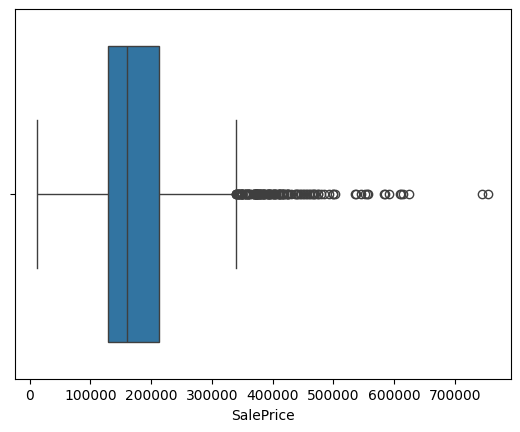

In [141]:
#outlier değerleri görmek için grafik
sns.boxplot(data = df, x= 'SalePrice')
plt.show()
#grafikte dikey çizgiler uygun aralıkları belirtir, mavi alanın ortasındaki çubuk medyan(ortanca) değeri verir
#dikey çizgilerin dışında çok fazla değer gözlemleniyor, yani outlier çok fazla var.
#bu outlier değerler lineer regresyonu bozabilir. lineer yerine random forest denenebilir.

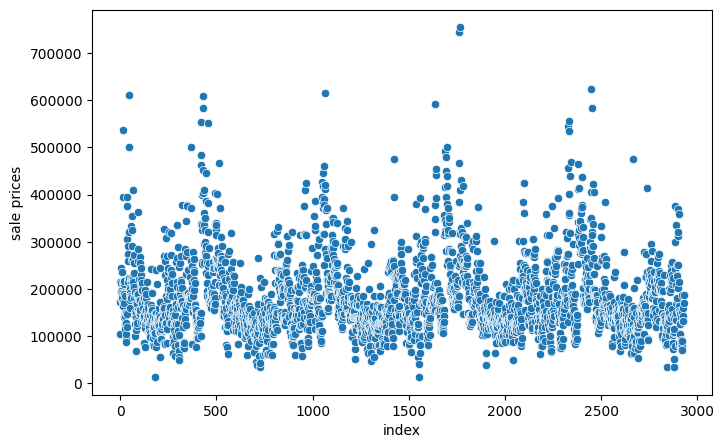

In [142]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.index, y=df['SalePrice'])
plt.xlabel("index")
plt.ylabel("sale prices")
plt.show()

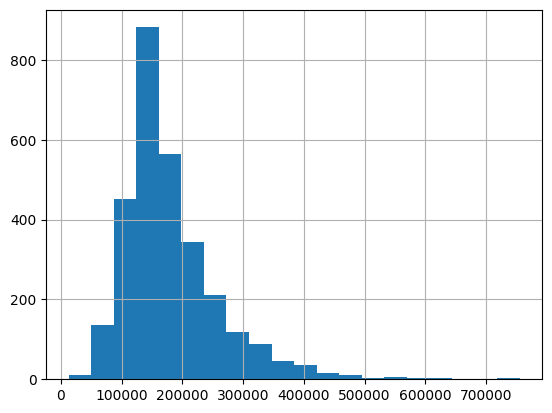

In [143]:
df["SalePrice"].hist(bins = 20)
plt.show()

In [144]:
model = LinearRegression()
model.fit(x_train_end, y_train)

y_pred_ln = model.predict(x_test_end)
print("real price for house:\n")
print(y_test.values[10])
print("model prediction price:")
print(y_pred_ln[10])

real price for house:

235000
model prediction price:
219775.89147710847


In [145]:
#performans metriklerini hesaplama

ln_r2 = r2_score(y_test, y_pred_ln)
ln_mae = mean_absolute_error(y_test, y_pred_ln)
ln_mse = mean_squared_error(y_test, y_pred_ln)
ln_rmse = np.sqrt(mse)

print("MODEL PERFORMANS METRİKLERİ\n")
print(f"R2: {ln_r2}\n")
print(f"MAE: {ln_mae}\n")
print(f"MSE: {ln_mse}\n")
print(f"RMSE: {ln_rmse}\n")

MODEL PERFORMANS METRİKLERİ

R2: 0.8451954457860297

MAE: 16405.093827166223

MSE: 1241152933.333316

RMSE: 35230.0004730814



In [146]:
#random forest ile
rf = RandomForestRegressor(
    n_estimators = 200, #ağaç sayısı
    max_depth = None, #derinlik:
    random_state = 42
)
rf.fit(x_train_end, y_train)
y_pred_rf = rf.predict(x_test_end)

In [147]:
#random forest için performans metrikleri
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mse)

print("MODEL PERFORMANS METRİKLERİ\n")
print(f"R2: {rf_r2}\n")
print(f"MAE: {rf_mae}\n")
print(f"MSE: {rf_mse}\n")
print(f"RMSE: {rf_rmse}\n")

MODEL PERFORMANS METRİKLERİ

R2: 0.9118349434541564

MAE: 15807.137508532427

MSE: 706867566.6874938

RMSE: 35230.0004730814



In [149]:
#XGBoost için
xgb = XGBRegressor(
    n_estimators = 300,
    learning_rate = 0.05,
    max_depth = 6,
    random_state = 42
)
xgb.fit(x_train_end, y_train)
xgb_pred = xgb.predict(x_test_end)


In [150]:
#xgboost için performans metrikleri
xg_r2 = r2_score(y_test, y_pred_rf)
xg_mae = mean_absolute_error(y_test, xgb_pred)
xg_mse = mean_squared_error(y_test, xgb_pred)
xg_rmse = np.sqrt(mse)

print("MODEL PERFORMANS METRİKLERİ\n")
print(f"R2: {xg_r2}\n")
print(f"MAE: {xg_mae}\n")
print(f"MSE: {xg_mse}\n")
print(f"RMSE: {xg_rmse}\n")

MODEL PERFORMANS METRİKLERİ

R2: 0.9118349434541564

MAE: 14504.2783203125

MSE: 555929216.0

RMSE: 35230.0004730814



In [151]:
results = {
    "Model" : ["Lineer Regresyon", "Random Forest", "XGBoost"],
    "MAE": [ln_mae, rf_mae, xg_mae],
    "R2":[ln_r2, rf_r2, xg_r2],
    "MSE":[ln_mse, rf_mse, xg_mse],
    "RMSE":[ln_rmse, rf_rmse, xg_rmse]
}

result_df = pd.DataFrame(results)
result_df

,Model,MAE,R2,MSE,RMSE
0,Lineer Regresyon,16405.093827,0.845195,1.241153e+09,35230.000473
1,Random Forest,15807.137509,0.911835,7.068676e+08,35230.000473
2,XGBoost,14504.278320,0.911835,5.559292e+08,35230.000473


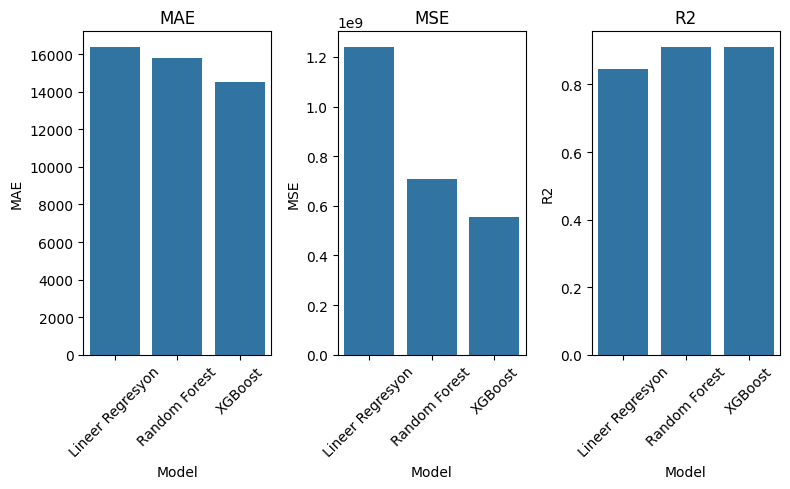

In [152]:

plt.figure(figsize=(8,5))

metrics = ["MAE", "MSE", "R2"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=result_df["Model"], y=result_df[metric])
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylabel(metric)

plt.tight_layout()
plt.show()
